### Problem to be solved -
To analyse a dataset of a restaurant's menu items and identify which items are
most popular among customers. Additionally,use this analysis to optimise the
restaurant's revenue by recommending changes to the menu

### Dataset-description
● item_id: A unique ID for each menu item

● item_name: The name of the menu item

● item_description: A brief description of the menu item

● item_type: The type of menu item (appetiser, entree, dessert, etc.)

● item_price: The price of the menu item

● ingredients: A list of ingredients used in the menu item

● calories: The number of calories in the menu item

● rating: The average customer rating of the menu item (on a scale of 1 to 5)

● sales_count: The number of times the menu item has been sold in the past quarter

● cost_per_item: The cost of producing each menu item

#### Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [85]:
df = pd.read_csv('menu_dataset.csv')
df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"['noodles', 'rice', 'beef', 'pork']",727.0,3.06,8.0,9.02
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"['pork', 'vegetables', 'fish', 'beef']",412.0,1.69,90.0,6.02
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"['shrimp', 'bread', 'rice', 'noodles']",358.0,2.89,26.0,4.44
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"['vegetables', 'beef']",355.0,2.50,NaN,6.59
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"['fish', 'pork', 'noodles']",117.0,3.49,22.0,8.86


In [86]:
df.shape

(1000, 10)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           1000 non-null   int64  
 1   item_name         1000 non-null   object 
 2   item_description  1000 non-null   object 
 3   item_type         1000 non-null   object 
 4   item_price        1000 non-null   float64
 5   ingredients       999 non-null    object 
 6   calories          999 non-null    float64
 7   rating            1000 non-null   float64
 8   sales_count       997 non-null    float64
 9   cost_per_item     1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.3+ KB


In [88]:
df.describe(include='all')

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
count,1000.000000,1000,1000,1000,1000.000000,999,999.000000,1000.000000,997.000000,1000.000000
unique,NaN,716,24,4,NaN,564,NaN,NaN,NaN,NaN
top,NaN,pork appetizer,delicious dessert,dessert,NaN,['fish'],NaN,NaN,NaN,NaN
freq,NaN,12,57,279,NaN,34,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,12.770730,NaN,569.714715,2.978620,48.958877,5.245420
std,288.819436,NaN,NaN,NaN,5.475494,NaN,259.523016,1.145524,29.847190,4.111146
min,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1.120000
25%,250.750000,NaN,NaN,NaN,8.837500,NaN,346.000000,2.010000,23.000000,3.250000
50%,500.500000,NaN,NaN,NaN,12.810000,NaN,580.000000,2.935000,48.000000,4.780000
75%,750.250000,NaN,NaN,NaN,16.452500,NaN,799.500000,3.950000,76.000000,6.782500


### Checking and removing null values

In [89]:
df.isnull().sum()

item_id             0
item_name           0
item_description    0
item_type           0
item_price          0
ingredients         1
calories            1
rating              0
sales_count         3
cost_per_item       0
dtype: int64

In [90]:
df.dropna(inplace=True)

In [91]:
df.isnull().sum()

item_id             0
item_name           0
item_description    0
item_type           0
item_price          0
ingredients         0
calories            0
rating              0
sales_count         0
cost_per_item       0
dtype: int64

### Outliers handling

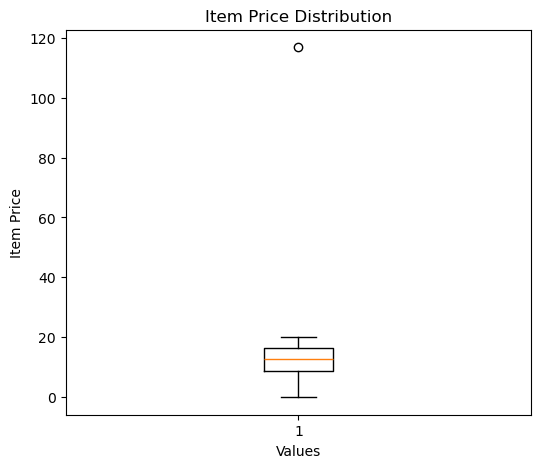

In [92]:
plt.figure(figsize=(6,5))
plt.boxplot(df['item_price'])
plt.title('Item Price Distribution')
plt.xlabel('Values')
plt.ylabel('Item Price')
plt.show()

In [93]:
df = df[(df['item_price']<30) & (df['item_price']>0)]

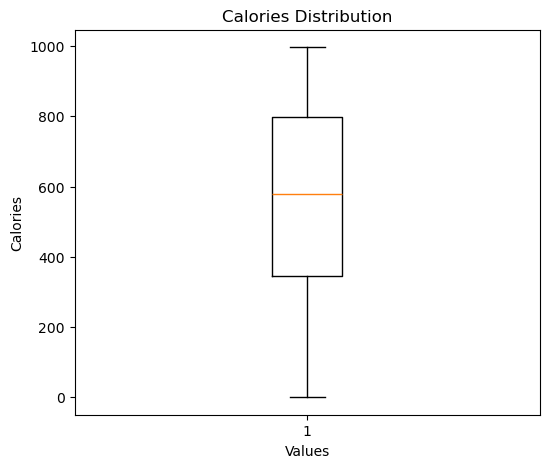

In [94]:
plt.figure(figsize=(6,5))
plt.boxplot(df['calories'])
plt.title('Calories Distribution')
plt.xlabel('Values')
plt.ylabel('Calories')
plt.show()

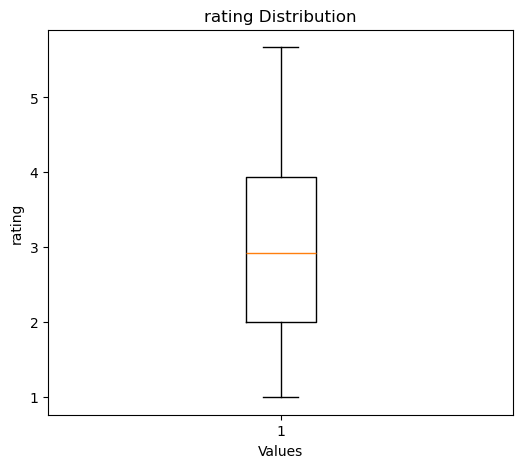

In [95]:
plt.figure(figsize=(6,5))
plt.boxplot(df['rating'])
plt.title('rating Distribution')
plt.xlabel('Values')
plt.ylabel('rating')
plt.show()

In [96]:
df = df[df['rating']<=5]

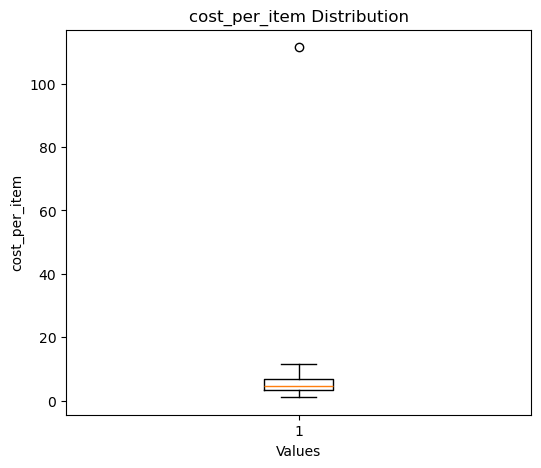

In [97]:
plt.figure(figsize=(6,5))
plt.boxplot(df['cost_per_item'])
plt.title('cost_per_item Distribution')
plt.xlabel('Values')
plt.ylabel('cost_per_item')
plt.show()

In [98]:
df = df[(df['cost_per_item']<20)]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           991 non-null    int64  
 1   item_name         991 non-null    object 
 2   item_description  991 non-null    object 
 3   item_type         991 non-null    object 
 4   item_price        991 non-null    float64
 5   ingredients       991 non-null    object 
 6   calories          991 non-null    float64
 7   rating            991 non-null    float64
 8   sales_count       991 non-null    float64
 9   cost_per_item     991 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 85.2+ KB


In [100]:
df.describe()

,item_id,item_price,calories,rating,sales_count,cost_per_item
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,504.477296,12.669778,569.519677,2.975207,49.019173,5.139990
std,286.990960,4.354920,259.289771,1.140264,29.838363,2.367416
min,1.000000,5.010000,0.000000,1.000000,0.000000,1.120000
25%,257.500000,8.835000,344.000000,2.015000,23.000000,3.250000
50%,505.000000,12.710000,580.000000,2.930000,48.000000,4.770000
75%,752.500000,16.450000,799.000000,3.940000,76.000000,6.785000
max,1000.000000,19.990000,997.000000,5.000000,100.000000,11.710000


## Feature Engineering

In [101]:
df['item_name'].nunique()

712

In [102]:
df['item_name'].value_counts()

item_name
pork appetizer                       12
vegetables dessert                   12
fish appetizer                       11
bread dessert                        10
beef entree                          10
                                     ..
bread beef pork chicken appetizer     1
noodles beef tofu pork appetizer      1
shrimp fish beef pork dessert         1
noodles tofu rice drink               1
shrimp tofu rice dessert              1
Name: count, Length: 712, dtype: int64

In [103]:
df['item_description'].nunique()

24

In [104]:
df['item_description'].value_counts()

item_description
delicious dessert           54
hearty dessert              54
satisfying appetizer        50
tasty dessert               50
healthy entree              47
mouth-watering entree       46
healthy dessert             45
hearty entree               43
healthy drink               43
healthy appetizer           42
satisfying drink            42
mouth-watering appetizer    41
delicious drink             41
mouth-watering drink        40
tasty entree                39
hearty appetizer            38
mouth-watering dessert      38
tasty appetizer             38
hearty drink                37
delicious entree            35
tasty drink                 35
satisfying dessert          34
satisfying entree           31
delicious appetizer         28
Name: count, dtype: int64

In [105]:
df['item_type'].nunique()

4

In [106]:
df['item_type'].value_counts()

item_type
dessert      275
entree       241
drink        238
appetizer    237
Name: count, dtype: int64

In [107]:
df['ingredients'].nunique()

563

In [108]:
df['ingredients'].value_counts()

ingredients
['fish']                                    34
['bread']                                   32
['chicken']                                 29
['tofu']                                    27
['vegetables']                              25
                                            ..
['shrimp', 'tofu', 'noodles', 'chicken']     1
['beef', 'fish', 'bread', 'shrimp']          1
['rice', 'tofu', 'pork']                     1
['vegetables', 'rice', 'tofu']               1
['shrimp', 'tofu', 'rice']                   1
Name: count, Length: 563, dtype: int64

In [109]:
df['ingredients'][0]

"['noodles', 'rice', 'beef', 'pork']"

In [110]:
df['ingredients'][0][2]

'n'

### converting ingredients column to a list of values

In [111]:
# function to convert sring into list
def convert_str_to_list(str):
    return eval(str)

In [112]:
df['ingredients'] = df['ingredients'].apply(convert_str_to_list)

In [113]:
df['ingredients'][0][0]

'noodles'

In [114]:
df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727.0,3.06,8.0,9.02
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412.0,1.69,90.0,6.02
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358.0,2.89,26.0,4.44
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117.0,3.49,22.0,8.86
5,6,noodles beef fish drink,delicious drink,drink,16.21,"[noodles, beef, fish]",833.0,4.64,77.0,6.21


In [115]:
# OneHotEncoding for ingredients
df = df.join(df['ingredients'].str.join('|').str.get_dummies())
df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,beef,bread,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727.0,3.06,8.0,9.02,1,0,0,0,1,1,1,0,0,0
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412.0,1.69,90.0,6.02,1,0,0,1,0,1,0,0,0,1
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358.0,2.89,26.0,4.44,0,1,0,0,1,0,1,1,0,0
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117.0,3.49,22.0,8.86,0,0,0,1,1,1,0,0,0,0
5,6,noodles beef fish drink,delicious drink,drink,16.21,"[noodles, beef, fish]",833.0,4.64,77.0,6.21,1,0,0,1,1,0,0,0,0,0


### checking the primary ingredients for all the items

In [116]:
for i in range(10,20):
    print(f"Count of {df.columns[i]} is : {df[df.columns[i]].sum()}")

Count of beef is : 255
Count of bread is : 244
Count of chicken is : 265
Count of fish is : 237
Count of noodles is : 259
Count of pork is : 244
Count of rice is : 236
Count of shrimp is : 253
Count of tofu is : 245
Count of vegetables is : 251


#### So the primary ingredients for most of the menu item is chicken followed by noodles and beef

### Checking items are vegetarian or not

In [118]:
def veg_non_veg(ingrediant_list):
    for item in ingrediant_list:
        if item in (['bread','noodles','rice','tofu','vegetables']):
            continue
        else:
            return 0
    return 1

In [119]:
df['is_vegeterian'] = df['ingredients'].apply(veg_non_veg)

In [120]:
df.sample(7)

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,...,bread,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables,is_vegeterian
207,208,beef rice entree,mouth-watering entree,entree,17.26,"[beef, rice]",945.0,1.81,68.0,10.09,...,0,0,0,0,0,1,0,0,0,0
592,593,vegetables bread chicken shrimp appetizer,mouth-watering appetizer,appetizer,19.70,"[vegetables, bread, chicken, shrimp]",529.0,4.59,6.0,9.11,...,1,1,0,0,0,0,1,0,1,0
895,896,chicken noodles entree,delicious entree,entree,7.62,"[chicken, noodles]",107.0,3.22,82.0,2.58,...,0,1,0,1,0,0,0,0,0,0
808,809,vegetables fish noodles shrimp dessert,mouth-watering dessert,dessert,18.58,"[vegetables, fish, noodles, shrimp]",771.0,1.59,78.0,9.50,...,0,0,1,1,0,0,1,0,1,0
538,539,bread pork entree,mouth-watering entree,entree,9.70,"[bread, pork]",149.0,2.39,24.0,5.26,...,1,0,0,0,1,0,0,0,0,0
606,607,tofu bread noodles drink,delicious drink,drink,14.09,"[tofu, bread, noodles]",321.0,1.89,34.0,7.66,...,1,0,0,1,0,0,0,1,0,1
92,93,bread drink,healthy drink,drink,17.29,[bread],220.0,2.78,60.0,4.98,...,1,0,0,0,0,0,0,0,0,1


In [121]:
df.is_vegeterian.value_counts()

is_vegeterian
0    780
1    211
Name: count, dtype: int64

Summary:
1. The primary item for most of the menu is Chicken Followed by Noodles and Beef <br>
2. There are a total 211 Vegeterian and 780 non-vegeterian items present in the menu

## Menu item analysis

### Distribution of menu item price

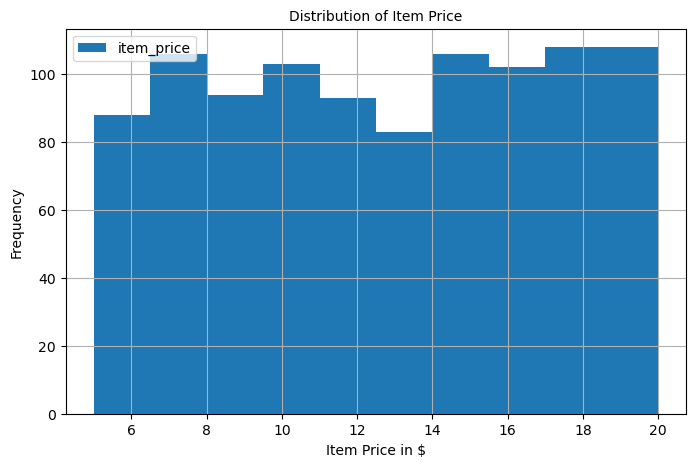

In [124]:
df['item_price'].plot(kind='hist',grid=True, figsize=(8,5))
plt.title("Distribution of Item Price",fontsize=10)
plt.xlabel("Item Price in $")
plt.legend()
plt.show()

### Relation between menu item rating and price

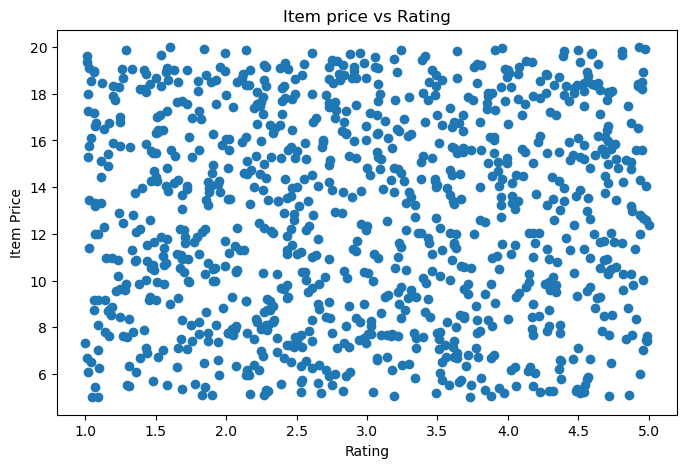

In [125]:
plt.figure(figsize=(8,5))
plt.scatter(data=df, x='rating', y='item_price',)
plt.xlabel("Rating")
plt.ylabel("Item Price")
plt.title("Item price vs Rating")
plt.show()

### Average rating of each item type

In [131]:
df.groupby(by='item_type')['rating'].mean().reset_index(name="Avg_Rating")

,item_type,Avg_Rating
0,appetizer,3.003924
1,dessert,2.895455
2,drink,3.036134
3,entree,2.977801


### Top-5 most popular items based on sales_count

In [134]:
items_df = df.groupby('item_name')['sales_count'].sum().reset_index()
items_df

,item_name,sales_count
0,beef appetizer,238.0
1,beef bread appetizer,89.0
2,beef bread dessert,64.0
3,beef bread fish chicken appetizer,80.0
4,beef bread pork rice appetizer,99.0
...,...,...
707,vegetables tofu beef dessert,2.0
708,vegetables tofu entree,83.0
709,vegetables tofu fish entree,94.0
710,vegetables tofu noodles chicken appetizer,6.0


In [136]:
top5_items_df = items_df.sort_values(by='sales_count',ascending=False).head().reset_index()
top5_items_df

,index,item_name,sales_count
0,201,fish appetizer,727.0
1,87,bread entree,551.0
2,85,bread dessert,511.0
3,229,fish entree,505.0
4,584,tofu drink,495.0


### Total revenue generated by restaurent in past quarter

In [137]:
df['revenue'] = df['item_price']*df['sales_count']

In [138]:
df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,...,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables,is_vegeterian,revenue
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727.0,3.06,8.0,9.02,...,0,0,1,1,1,0,0,0,0,153.20
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412.0,1.69,90.0,6.02,...,0,1,0,1,0,0,0,1,0,1592.10
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358.0,2.89,26.0,4.44,...,0,0,1,0,1,1,0,0,0,485.68
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117.0,3.49,22.0,8.86,...,0,1,1,1,0,0,0,0,0,413.60
5,6,noodles beef fish drink,delicious drink,drink,16.21,"[noodles, beef, fish]",833.0,4.64,77.0,6.21,...,0,1,1,0,0,0,0,0,0,1248.17


In [139]:
total_revenue = df['revenue'].sum()
print(f"Total revenue in the past quarter is: ${total_revenue}")

Total revenue in the past quarter is: $621253.76


In [140]:
df[df['sales_count']==0][['item_name','sales_count']]

,item_name,sales_count
130,pork bread shrimp rice dessert,0.0
183,rice beef dessert,0.0
212,bread noodles vegetables pork dessert,0.0
323,tofu shrimp chicken noodles entree,0.0
641,bread beef vegetables dessert,0.0
661,shrimp pork chicken rice dessert,0.0


### Removing items having 0 sales count

In [141]:
df = df[~(df['revenue']==0)]

In [142]:
df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,...,chicken,fish,noodles,pork,rice,shrimp,tofu,vegetables,is_vegeterian,revenue
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727.0,3.06,8.0,9.02,...,0,0,1,1,1,0,0,0,0,153.20
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412.0,1.69,90.0,6.02,...,0,1,0,1,0,0,0,1,0,1592.10
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358.0,2.89,26.0,4.44,...,0,0,1,0,1,1,0,0,0,485.68
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117.0,3.49,22.0,8.86,...,0,1,1,1,0,0,0,0,0,413.60
5,6,noodles beef fish drink,delicious drink,drink,16.21,"[noodles, beef, fish]",833.0,4.64,77.0,6.21,...,0,1,1,0,0,0,0,0,0,1248.17


### Gross profit margin for each item

In [143]:
df['gross_profit_margin'] = ((df['revenue']-df['cost_per_item'])/df['revenue'])*100

In [144]:
df.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,...,fish,noodles,pork,rice,shrimp,tofu,vegetables,is_vegeterian,revenue,gross_profit_margin
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"[noodles, rice, beef, pork]",727.0,3.06,8.0,9.02,...,0,1,1,1,0,0,0,0,153.20,94.112272
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"[pork, vegetables, fish, beef]",412.0,1.69,90.0,6.02,...,1,0,1,0,0,0,1,0,1592.10,99.621883
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"[shrimp, bread, rice, noodles]",358.0,2.89,26.0,4.44,...,0,1,0,1,1,0,0,0,485.68,99.085818
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"[fish, pork, noodles]",117.0,3.49,22.0,8.86,...,1,1,1,0,0,0,0,0,413.60,97.857834
5,6,noodles beef fish drink,delicious drink,drink,16.21,"[noodles, beef, fish]",833.0,4.64,77.0,6.21,...,1,1,0,0,0,0,0,0,1248.17,99.502472


In [159]:
df[df['gross_profit_margin']==df['gross_profit_margin'].max()][['item_name','gross_profit_margin']]

,item_name,gross_profit_margin
82,shrimp bread pork entree,99.791025


### Summary 
- The distribution of menu item price is almost similar for each price bin having minimum count between 12-14 and maximun between 18-20.
- There is no any recognized relationship between rating and item price.
- The best average rated item_type category is drink
- Top 5 most popular items based on sales_count are - fish appetizer, bread entree, bread desert, fish entree and tofu drink
- Total revenue generated by the restaurant in the past quarter is $621,253.76.

- 
- Maximum gross profit margin is $99.791025 for the item - shrimp bread pork entree.

### Menu items with lowest gross profit

In [146]:
low_margin_items = df.sort_values(by='gross_profit_margin')[['item_name','gross_profit_margin']].head()

#### Other items having lowest margin

In [147]:
low_margin_items

,item_name,gross_profit_margin
667,shrimp pork tofu beef appetizer,40.628779
855,pork rice chicken tofu drink,47.005829
735,rice tofu appetizer,47.281831
396,beef vegetables shrimp bread entree,50.148368
614,vegetables beef shrimp noodles entree,53.984576


### ingredients and cost per item relationship

### Average cost per item for all items

In [149]:
avg_cost = df['cost_per_item'].mean()
avg_cost

5.142314720812183

In [150]:
veg_avg_cost = df[df['is_vegeterian']==1]['cost_per_item'].mean()
veg_avg_cost

5.3072985781990525

In [151]:
non_veg_avg_cost = df[df['is_vegeterian']==0]['cost_per_item'].mean()
non_veg_avg_cost

5.097338501291989

The average cost of items which is vegeterian is having higher cost compared to items which is non-veg

### Lets find out more items which should be removed from the menu

In [154]:
item_df = df.groupby('item_name').agg({'sales_count':'sum', 'gross_profit_margin':'mean'}).reset_index()
item_df

,item_name,sales_count,gross_profit_margin
0,beef appetizer,238.0,97.420448
1,beef bread appetizer,89.0,99.742844
2,beef bread dessert,64.0,99.203745
3,beef bread fish chicken appetizer,80.0,99.315642
4,beef bread pork rice appetizer,99.0,99.475456
...,...,...,...
701,vegetables tofu beef dessert,2.0,74.953789
702,vegetables tofu entree,83.0,99.703367
703,vegetables tofu fish entree,94.0,99.720906
704,vegetables tofu noodles chicken appetizer,6.0,93.389282


In [156]:
items_to_remove = item_df.sort_values(by=['sales_count','gross_profit_margin'])[['item_name','sales_count','gross_profit_margin']].head(10)
items_to_remove

,item_name,sales_count,gross_profit_margin
530,shrimp pork tofu beef appetizer,1.0,40.628779
389,pork rice chicken tofu drink,1.0,47.005829
472,rice tofu appetizer,1.0,47.281831
66,beef vegetables shrimp bread entree,1.0,50.148368
630,vegetables beef shrimp noodles entree,1.0,53.984576
203,fish beef dessert,1.0,54.628422
241,fish pork chicken entree,1.0,56.965718
620,tofu vegetables entree,1.0,63.705972
181,chicken shrimp vegetables dessert,1.0,71.690821
20,beef fish chicken pork drink,2.0,71.671196


The above mentioned items can be removed from menu as they are having least sales count along with less gross profit margin

### Let's find out some items which should be promoted

In [158]:
items_to_promote = item_df.sort_values(by=['sales_count'],ascending=False)[['item_name','sales_count','gross_profit_margin']].head(20)
items_to_promote

,item_name,sales_count,gross_profit_margin
199,fish appetizer,727.0,99.375519
86,bread entree,551.0,97.218119
84,bread dessert,511.0,99.066901
227,fish entree,505.0,99.028628
579,tofu drink,495.0,94.946610
349,pork appetizer,453.0,93.603214
85,bread drink,438.0,98.813684
653,vegetables dessert,432.0,98.101007
154,chicken entree,422.0,98.683933
226,fish drink,404.0,98.614647


### The above mentioned items can be promoted from menu as they are having most sales_count along with high gross profit margin

## Summary:
- Menu items with lowest gross profit margins are - shrimp pork tofu beef appetizer, pork rice chicken tofu drink, rice tofu appetizer, beef vegetables shrimp bread entree, vegetables beef shrimp noodles entree
- The average cost of items which is vegeterian is having higher cost compared to items which is non-veg
- Having beef as an ingredients in the items results in the increase of average of cost per item,  which means we need to cut some quality of beef in the ingredients and we can try to get a suppilier which can provide beef as less price
- Based on sales count and gross profit margin, some of the items from the menu can be removed and some can be promoted.

### Plan to optimizing the menu to maximize revenue
- Remove the items from the menu having low sales count and low gross profit margin.
- Promote the items having a high sales count and increase the item price to get more gross profit margin.
- Decrese the item price for the items having good rating but low sales count.
- Either remove the items or increase the price of items from menu having items with low gross profit margin and having high cost ingredients
- Since veg items have high pricing, remove the veg-items having low popularity